<a href="https://colab.research.google.com/github/Mateusfcs/Data-Science/blob/main/Projeto_AnaliseDeDados_Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MiniProjeto2 Escola DNC
## Aluno: Mateus fernandes Carneiro dos Santos
## RID: 90663

# Case Walmart

In [ ]:
#Importando bibliotecas para análise do case
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
#visualização dos dados
df = pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#Tratando a coluna Date
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


In [ ]:
#Identificando os feriados do df
df.Holiday_Flag.value_counts()

0    5985
1     450
Name: Holiday_Flag, dtype: int64

In [ ]:
#Criando df com as informações sobre vendas em dias com feriados
df_Holiday_Flag = df[df.Holiday_Flag == 1]
df_Holiday_Flag

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787,2010,9,10
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010,11,26
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010,12,31
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,2011,2,11
...,...,...,...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625,2011,9,9
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523,2011,11,25
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523,2011,12,30
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424,2012,2,10


In [ ]:
#Faturamento nos dias de feriados
df_sales_Holiday_Flag = df_Holiday_Flag.Weekly_Sales.sum()
print('O faturamento total em feriados em todo período é de : ', df_sales_Holiday_Flag)

O faturamento total em feriados em todo período é de :  505299551.56


In [ ]:
#Criando df com as informações sobre vendas em dias normais (sem feriados)
df_no_Holiday = df[df.Holiday_Flag == 0]
df_no_Holiday

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,3,12
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,5
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19


In [ ]:
df_no_Holiday_Sales = df_no_Holiday.Weekly_Sales.sum()
print('O faturamento total em dias sem feriado em todo período é de : ', df_no_Holiday_Sales)

O faturamento total em dias sem feriado em todo período é de :  6231919435.55


<Axes: xlabel='Month', ylabel='Weekly_Sales'>

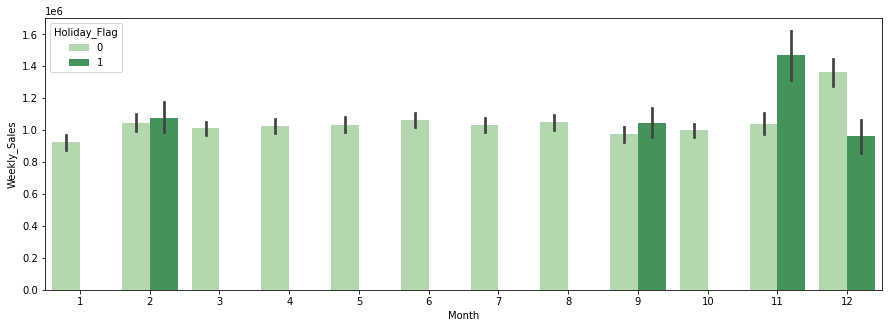

In [ ]:

#Analisando as vendas totais em dias normai e dias com feriado
plt.figure(figsize=(15,5))
sns.barplot(x = 'Month',
            y = 'Weekly_Sales',
            hue = 'Holiday_Flag',
            palette = "Greens",
            data = df)

In [ ]:
#Média de Weekly_Sales:
weekly_sales_mean = df.groupby(df['Date'].dt.week)['Weekly_Sales'].mean()
df['Weekly_Sales_Mean'] = df['Date'].dt.week.map(weekly_sales_mean)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
display(df)

<ipython-input-11-34e39c61dc4b>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_sales_mean = df.groupby(df['Date'].dt.week)['Weekly_Sales'].mean()
<ipython-input-11-34e39c61dc4b>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Weekly_Sales_Mean'] = df['Date'].dt.week.map(weekly_sales_mean)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Weekly_Sales_Mean
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2010,2,5,1051773.78
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2010,2,12,1079127.99
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2,19,1090297.89
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2,26,991599.54
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,2010,3,5,1042319.33
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,4.00,192.01,8.68,2012,9,28,949411.90
6431,45,2012-10-05,733455.07,0,64.89,3.98,192.17,8.67,2012,10,5,1036157.79
6432,45,2012-10-12,734464.36,0,54.47,4.00,192.33,8.67,2012,10,12,990020.80
6433,45,2012-10-19,718125.53,0,56.47,3.97,192.33,8.67,2012,10,19,992652.10


In [ ]:
#Criando novo dataframe dropando as colunas do df1 que não serão utilizadas para análise do case:
df2 = df.loc[:, ['Store','Date','Year','Month','Day','Weekly_Sales','Weekly_Sales_Mean','Holiday_Flag','CPI','Unemployment']]
display(df2)

,Store,Date,Year,Month,Day,Weekly_Sales,Weekly_Sales_Mean,Holiday_Flag,CPI,Unemployment
0,1,2010-02-05,2010,2,5,1643690.90,1051773.78,0,211.10,8.11
1,1,2010-02-12,2010,2,12,1641957.44,1079127.99,1,211.24,8.11
2,1,2010-02-19,2010,2,19,1611968.17,1090297.89,0,211.29,8.11
3,1,2010-02-26,2010,2,26,1409727.59,991599.54,0,211.32,8.11
4,1,2010-03-05,2010,3,5,1554806.68,1042319.33,0,211.35,8.11
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,2012,9,28,713173.95,949411.90,0,192.01,8.68
6431,45,2012-10-05,2012,10,5,733455.07,1036157.79,0,192.17,8.67
6432,45,2012-10-12,2012,10,12,734464.36,990020.80,0,192.33,8.67
6433,45,2012-10-19,2012,10,19,718125.53,992652.10,0,192.33,8.67


In [ ]:
#Calculando o preço médio semanal de vendas por Loja
grouped = df.groupby(["Store", "Date"])["Weekly_Sales"].mean()

weekly_sales_by_store = grouped.groupby("Store").mean()
weekly_sales_by_store = weekly_sales_by_store.sort_values(ascending=False)
print(weekly_sales_by_store)

Store
20   2107676.87
4    2094712.96
14   2020978.40
13   2003620.31
2    1925751.34
10   1899424.57
27   1775216.20
6    1564728.19
1    1555264.40
39   1450668.13
19   1444999.04
31   1395901.44
23   1389864.46
24   1356755.39
11   1356383.12
28   1323522.24
41   1268125.42
32   1166568.15
18   1084718.42
22   1028501.04
12   1009001.61
26   1002911.84
34    966781.56
40    964128.04
35    919724.98
8     908749.52
17    893581.39
45    785981.41
21    756069.08
25    706721.53
43    633324.72
15    623312.47
7     570617.31
42    556403.86
9     543980.55
29    539451.43
16    519247.73
37    518900.28
30    438579.62
3     402704.44
38    385731.65
36    373511.99
5     318011.81
44    302748.87
33    259861.69
Name: Weekly_Sales, dtype: float64


In [ ]:
# Sabemos que a loja 20 foi a Store com maior numero de vendas no período calculando a média anteriormente
# Calculando a média semanal de vendas para todo o período do DataFrame
df_loja_20 = df[df["Store"] == 20]

media_semanal = df["Weekly_Sales"].mean()

# Contando quantas semanas a loja 20 ultrapassou a média semanal
Weeks_Above_Average = (df_loja_20["Weekly_Sales"] > media_semanal).sum()

print("A loja 20 ultrapassou a média semanal em", Weeks_Above_Average, "semanas.")

A loja 20 ultrapassou a média semanal em 143 semanas.


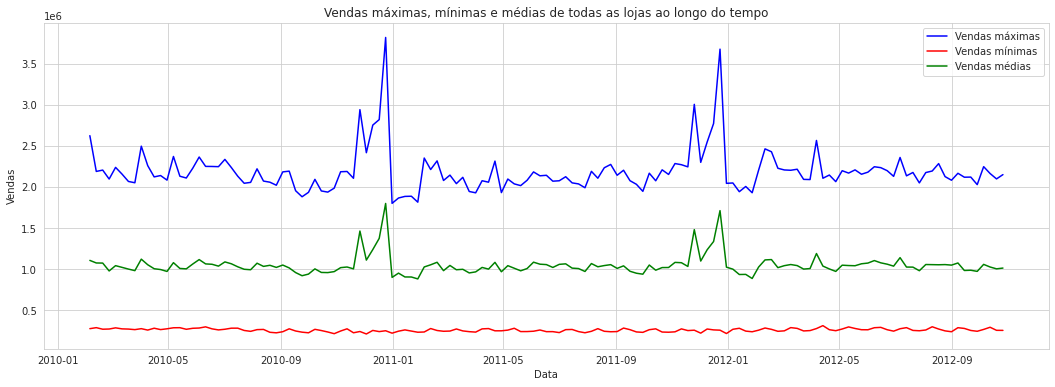

In [ ]:
df_sales2 = df.groupby('Date')['Weekly_Sales'].agg(['max', 'min', 'mean'])

# Definindo o estilo do gráfico
sns.set_style('whitegrid')

# Criando o gráfico de linha com as vendas máximas, mínimas e médias
fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(df_sales2.index, df_sales2['max'], label='Vendas máximas', color='blue')
ax.plot(df_sales2.index, df_sales2['min'], label='Vendas mínimas', color='red')
ax.plot(df_sales2.index, df_sales2['mean'], label='Vendas médias', color='green')

ax.set_title('Vendas máximas, mínimas e médias de todas as lojas ao longo do tempo')
ax.set_xlabel('Data')
ax.set_ylabel('Vendas')

ax.legend()


In [ ]:
df_year = df[df['Year'].isin([2010, 2011, 2012])]

# Calculando a média das vendas semanais por loja e ano
df_sales_mean = df_year.groupby(['Store', 'Year'])['Weekly_Sales'].mean()

# Utilizando o método pivot_table para criar um novo dataset com as colunas de índice das lojas e as médias de Weekly_Sales para cada ano
df_pivot = df_sales_mean.reset_index().pivot_table(index='Store', columns='Year', values='Weekly_Sales')

# Renomeando as colunas para facilitar a interpretação dos dados
df_pivot.columns = ['Sales_mean_2010', 'Sales_mean_2011', 'Sales_mean_2012']

df_pivot['Pct_2010_2011'] = df_pivot['Sales_mean_2011'].pct_change(periods=1)

# Calculando o crescimento de 2011 para 2012
df_pivot['Pct_2011_2012'] = df_pivot['Sales_mean_2012'].pct_change(periods=1)

display(df_pivot)

,Sales_mean_2010,Sales_mean_2011,Sales_mean_2012,Pct_2010_2011,Pct_2011_2012
Store,,,,,
1,1526642.33,1556190.75,1586094.37,NaN,NaN
2,1984955.50,1896305.41,1895271.99,0.22,0.19
3,390529.56,400324.55,419173.01,-0.79,-0.78
4,1993343.14,2136390.26,2157469.52,4.34,4.15
5,309083.97,316746.54,329507.86,-0.85,-0.85
6,1602340.01,1548630.06,1542210.40,3.89,3.68
7,532668.29,589666.16,589943.17,-0.62,-0.62
8,900093.23,913707.43,912416.75,0.55,0.55
9,523525.41,551653.26,557535.57,-0.40,-0.39


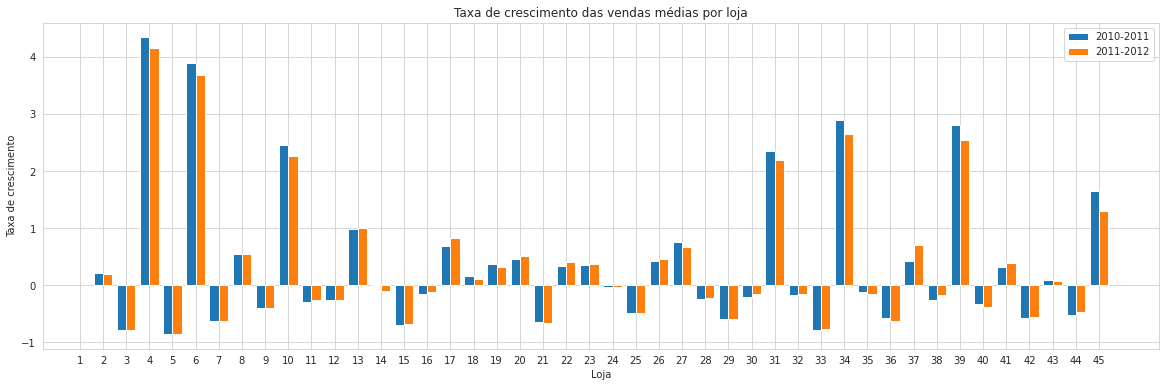

In [ ]:
# Criando df para plotar os aumentos
df_Taxa_crescimento = df_pivot.groupby('Store')[['Pct_2010_2011', 'Pct_2011_2012']].mean()

# Criando gráfico de barras para visualização dos aumentos em % das vendas das lojas por ano
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(df_Taxa_crescimento.index, df_Taxa_crescimento['Pct_2010_2011'], width=0.4, label='2010-2011')
ax.bar(df_Taxa_crescimento.index + 0.4, df_Taxa_crescimento['Pct_2011_2012'], width=0.4, label='2011-2012')

ax.set_title('Taxa de crescimento das vendas médias por loja')
ax.set_xlabel('Loja')
ax.set_ylabel('Taxa de crescimento')
ax.set_xticks(df_Taxa_crescimento.index + 0.2)
ax.set_xticklabels(df_Taxa_crescimento.index)


ax.legend()


plt.show()
